In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:

end = dt.datetime.now()
start = dt.date(end.year -1, end.month,end.day)

In [3]:
df = yf.download('FB',start,end )
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-23,239.630005,242.419998,231.750000,232.600006,232.600006,21771800
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18325800
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100
2020-07-29,231.139999,233.699997,230.309998,233.289993,233.289993,13588300


In [4]:
df.shape

(253, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

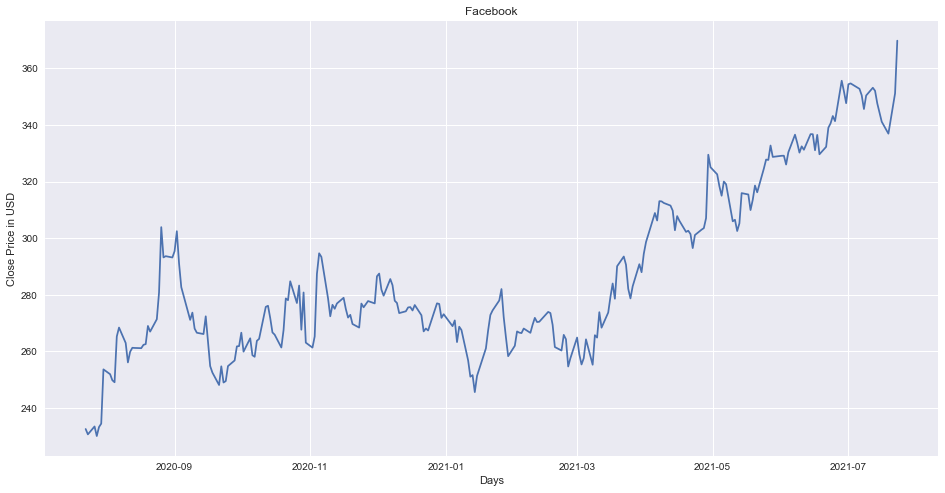

In [5]:
plt.figure(figsize=(16,8))
plt.title('Facebook')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show

In [15]:
df = df[['Close']]
df.tail()

,Close
Date,
2021-07-19,336.950012
2021-07-20,341.660004
2021-07-21,346.230011
2021-07-22,351.190002
2021-07-23,369.790009


In [16]:
# Create a variable to predict the xdays out into the future
future_days = 25
# Create a new column (target) shifted 'x' days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
Date,,
2021-07-20,341.660004,NaN
2021-07-21,346.230011,NaN
2021-07-22,351.190002,NaN
2021-07-23,369.790009,NaN


In [17]:
# Create independent data set (x)
X = np.array(df.drop(['Prediction'],1))[:-future_days]
# Remove the last 25 rows 
print(X)

[[232.6000061 ]
 [230.71000671]
 [233.5       ]
 [230.11999512]
 [233.28999329]
 [234.5       ]
 [253.66999817]
 [251.96000671]
 [249.83000183]
 [249.11999512]
 [265.27999878]
 [268.44000244]
 [263.        ]
 [256.13000488]
 [259.89001465]
 [261.29998779]
 [261.23999023]
 [261.16000366]
 [262.33999634]
 [262.58999634]
 [269.01000977]
 [267.01000977]
 [271.39001465]
 [280.82000732]
 [303.91000366]
 [293.22000122]
 [293.66000366]
 [293.20001221]
 [295.44000244]
 [302.5       ]
 [291.11999512]
 [282.73001099]
 [271.16000366]
 [273.72000122]
 [268.08999634]
 [266.60998535]
 [266.1499939 ]
 [272.42001343]
 [263.51998901]
 [254.82000732]
 [252.52999878]
 [248.1499939 ]
 [254.75      ]
 [249.02000427]
 [249.52999878]
 [254.82000732]
 [256.82000732]
 [261.79000854]
 [261.8999939 ]
 [266.63000488]
 [259.94000244]
 [264.6499939 ]
 [258.66000366]
 [258.11999512]
 [263.76000977]
 [264.45001221]
 [275.75      ]
 [276.14001465]
 [271.82000732]
 [266.72000122]
 [265.92999268]
 [261.3999939 ]
 [267.55

In [9]:
# Create the dependent data set (y)
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[293.22000122 293.66000366 293.20001221 295.44000244 302.5
 291.11999512 282.73001099 271.16000366 273.72000122 268.08999634
 266.60998535 266.1499939  272.42001343 263.51998901 254.82000732
 252.52999878 248.1499939  254.75       249.02000427 249.52999878
 254.82000732 256.82000732 261.79000854 261.8999939  266.63000488
 259.94000244 264.6499939  258.66000366 258.11999512 263.76000977
 264.45001221 275.75       276.14001465 271.82000732 266.72000122
 265.92999268 261.3999939  267.55999756 278.73001099 278.11999512
 284.79000854 277.10998535 283.29000854 267.67001343 280.82998657
 263.10998535 261.35998535 265.29998779 287.38000488 294.67999268
 293.41000366 278.76998901 272.42999268 276.48001099 275.07998657
 276.95001221 278.95999146 275.         271.97000122 272.94000244
 269.70001221 268.42999268 276.92001343 275.58999634 277.80999756
 276.97000122 286.54998779 287.51998901 281.8500061  279.70001221
 285.57998657 283.3999939  277.92001343 277.11999512 273.54998779
 274.19000244 275

In [10]:
# Split data intp 80% training and 20% test
x_train, x_test, y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

In [11]:
# Creating decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)

# Creating the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [18]:
# get the last x rows of future data set
x_future = df.drop (['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[305.26000977],
       [315.94000244],
       [315.45999146],
       [309.95999146],
       [313.58999634],
       [318.60998535],
       [316.23001099],
       [324.63000488],
       [327.79000854],
       [327.66000366],
       [332.75      ],
       [328.73001099],
       [329.13000488],
       [329.1499939 ],
       [326.04000854],
       [330.3500061 ],
       [336.57998657],
       [333.67999268],
       [330.25      ],
       [332.45999146],
       [331.26000977],
       [336.76998901],
       [336.75      ],
       [331.07998657],
       [336.51000977]])

In [19]:
# Model Tree Prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Model Linear Regression Prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[316.23001099 332.29000854 339.02999878 340.58999634 343.17999268
 336.76998901 355.64001465 351.89001465 347.70999146 347.70999146
 354.70001221 352.77999878 350.48999023 350.48999023 350.42001343
 353.16000366 369.79000854 347.63000488 344.45999146 341.16000366
 351.19000244 341.66000366 346.23001099 351.19000244 369.79000854]

[310.61307488 319.52738647 319.12673381 314.53602713 317.56589761
 321.75595163 319.76944904 326.78070506 329.41827777 329.30976608
 333.55825339 330.20287331 330.5367378  330.55342211 327.95759837
 331.55504102 336.75504338 334.33449404 331.47156854 333.31619082
 332.31459737 336.91363347 336.89694916 332.1643367  336.69663556]


<ipython-input-21-d09f7f0db7c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


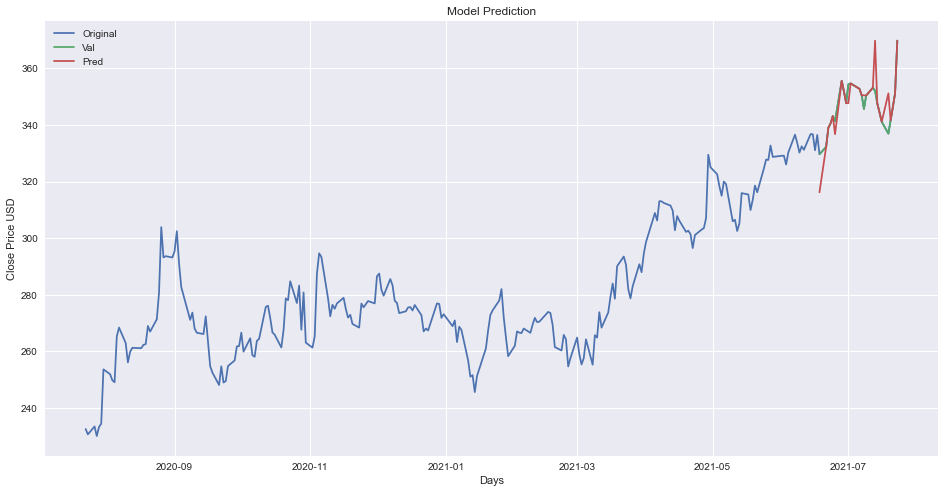

In [21]:
# Visualize tree model
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model Prediction")
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Val','Pred'])
plt.show()

<ipython-input-22-9f2bcc4a4167>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


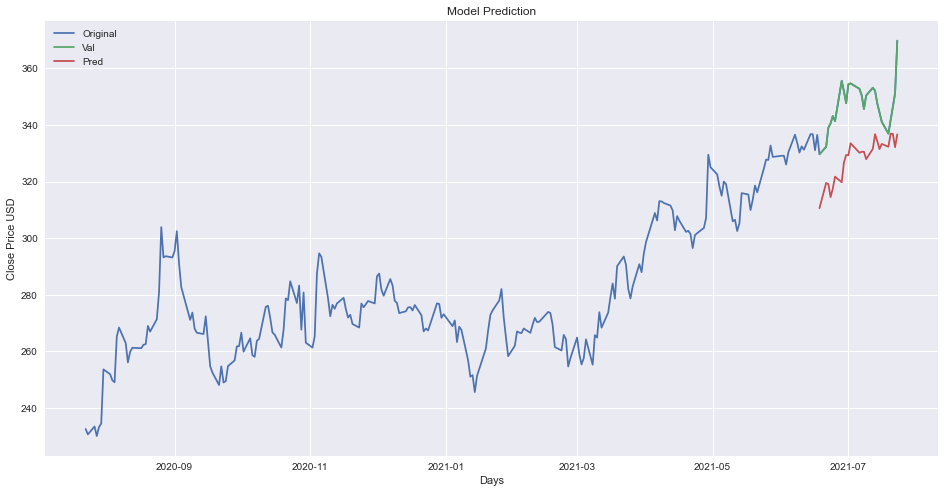

In [22]:
# Visualize linear model
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model Prediction")
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Val','Pred'])
plt.show()